Feature Engineering und Baseline Modell

Environment für dieses Notebook: `ads-ml-full` (*requirements-py3.11-ads-ml-full.txt*).


## Daten einlesen

In [267]:
from pathlib import Path

URL = (
    "https://data.milwaukee.gov/dataset/7a8b81f6-d750-4f62-aee8-30ffce1c64ce/resource/f083631f-e34e-4ad6-aba1-d6d7dd265170/download/2002-2018-property-sales-data.csv"
)
data = Path("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum.csv")

In [268]:
data = Path("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum.csv")

In [269]:
import pandas as pd

data = pd.read_csv("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum.csv") 
data.head(10)

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price
0,Lg Apartment,3,6974,Apartment: 48: 1-Br Units,1964,35736,0,19100,2002-03,2000000
1,Lg Apartment,9,6970,Apartment: 32: 2-Br Units,1980,31424,0,0,2002-05,1500000
2,Lg Apartment,14,6979,"Apartment: 37: 1-Br ,1: 2-Br Units",1974,27186,0,0,2002-10,1790000
3,Lg Apartment,3,6974,"Apartment: 33: 1-Br ,6: 2-Br Units",1966,32439,0,41715,2003-02,1725000
4,Lg Apartment,9,6970,Apartment: 40: 3-Br Units,1990,48840,0,0,2003-06,2901900
5,Lg Apartment,2,6970,"Apartment: 20: 2-Br ,2: 3-Br Units",1973,0,0,0,2003-08,900000
6,Lg Apartment,2,6967,Apartment: 60: 2-Br Units,1974,68340,0,0,2003-11,2875000
7,Lg Apartment,13,6980,"Apartment: 18: 1-Br ,7: 2-Br Units",1966,20600,0,30000,2003-11,1170000
8,Residential,1,1220,Cape Cod,1951,1620,2,7800,2003-12,148500
9,Residential,13,4660,Ranch,1956,986,1,10428,2003-12,105000


In [270]:
data.sample(5, random_state=42)

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price
1318,Residential,10,2710,Cape Cod,1957,1100,2,4025,2010-06,120000
9506,Residential,5,1040,Duplex N/S,1957,1901,2,7623,2018-12,134900
7224,Residential,11,4410,Cape Cod,1951,1940,2,6760,2017-08,184000
5391,Lg Apartment,9,6610,Apartment: 4: 2-Br Units,1972,3604,0,9625,2016-05,184900
6473,Residential,9,360,Split Level,1957,1493,2,11700,2017-03,150000


In [271]:
anzahl_objekte = data.shape[0]
print("Anzahl der Objekte im Datensatz:", anzahl_objekte)

Anzahl der Objekte im Datensatz: 9603


### Outlier & Co

Auch Outliers können wir mit Fachwissen begegnen, bevor wir robuste Transformationen anwenden.

Salespreis Outlier? 

In [272]:
data["Sale_price"].sort_values(ascending=True).iloc[:5]

1370    100000
1679    100000
4734    100000
1645    100000
1617    100000
Name: Sale_price, dtype: int64

In [273]:
data["Sale_price"].sort_values(ascending=False).iloc[:5] #könnte für historisch wertvolle Gebäude realistisch sein? 

9595    58000000
7592    42275000
58      22500000
56      15290000
3424    13465000
Name: Sale_price, dtype: int64

Wohnraum und mind. 20 m2

In [274]:
data["Lotsize"].sort_values(ascending=True).iloc[:5]

28      0
8293    0
30      0
31      0
32      0
Name: Lotsize, dtype: int64

In [275]:
import numpy as np

data.loc[data["Lotsize"] < 20, "Lotsize"] = np.nan

In [276]:
data["Fin_sqft"].sort_values(ascending=True).iloc[:5]

51      0
31      0
18      0
2529    0
4945    0
Name: Fin_sqft, dtype: int64

In [277]:
data["Fin_sqft"].sort_values(ascending=False).iloc[:5]

58      230828
56      197426
9595    190121
232     161350
3824    127540
Name: Fin_sqft, dtype: int64

In [278]:
import numpy as np

data.loc[data["Fin_sqft"] < 10, "Fin_sqft"] = np.nan

In [279]:
data.head(10)

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price
0,Lg Apartment,3,6974,Apartment: 48: 1-Br Units,1964,35736.0,0,19100.0,2002-03,2000000
1,Lg Apartment,9,6970,Apartment: 32: 2-Br Units,1980,31424.0,0,NaN,2002-05,1500000
2,Lg Apartment,14,6979,"Apartment: 37: 1-Br ,1: 2-Br Units",1974,27186.0,0,NaN,2002-10,1790000
3,Lg Apartment,3,6974,"Apartment: 33: 1-Br ,6: 2-Br Units",1966,32439.0,0,41715.0,2003-02,1725000
4,Lg Apartment,9,6970,Apartment: 40: 3-Br Units,1990,48840.0,0,NaN,2003-06,2901900
5,Lg Apartment,2,6970,"Apartment: 20: 2-Br ,2: 3-Br Units",1973,NaN,0,NaN,2003-08,900000
6,Lg Apartment,2,6967,Apartment: 60: 2-Br Units,1974,68340.0,0,NaN,2003-11,2875000
7,Lg Apartment,13,6980,"Apartment: 18: 1-Br ,7: 2-Br Units",1966,20600.0,0,30000.0,2003-11,1170000
8,Residential,1,1220,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500
9,Residential,13,4660,Ranch,1956,986.0,1,10428.0,2003-12,105000


In [280]:
anzahl_objekte = data.shape[0]
print("Anzahl der Objekte im Datensatz:", anzahl_objekte)

Anzahl der Objekte im Datensatz: 9603


In [281]:
#del data["District"]
#del data["Nbhd"]
#del data["Premium_Segment"]
#del data["Fin_sqft"]

In [282]:
data["Fin_sqft"].sort_values(ascending=False).iloc[:5]

58      230828.0
56      197426.0
9595    190121.0
232     161350.0
3824    127540.0
Name: Fin_sqft, dtype: float64

In [283]:
description = data['Fin_sqft'].describe()

print(description)

count      9592.000000
mean       2180.453711
std        6701.057102
min         624.000000
25%        1079.000000
50%        1260.000000
75%        1746.000000
max      230828.000000
Name: Fin_sqft, dtype: float64


Unrealistisch hoche Werte, alles über 4000sqm sollte weggenommen werden

In [284]:
len(data[(data["Fin_sqft"] < 30) | (data["Fin_sqft"] > 4000)])

394

In [285]:
# Ursprüngliche Anzahl der Objekte im Datensatz
urspruengliche_anzahl = len(data)

# Entfernen der Objekte aus dem Datensatz, deren 'Fin_sqft' kleiner als 30 oder größer als 4000 ist
data_filtered = data[(data["Fin_sqft"] >= 30) & (data["Fin_sqft"] <= 4000)]

# Neue Anzahl der Objekte im Datensatz nach dem Entfernen
nach_loeschen_anzahl = len(data_filtered)

# Berechnung und Ausgabe der Anzahl der gelöschten Objekte
geloeschte_objekte = urspruengliche_anzahl - nach_loeschen_anzahl
print(f"Anzahl der gelöschten Objekte: {geloeschte_objekte}")
print(f"Anzahl der Objekte nach dem Löschen: {nach_loeschen_anzahl}")

Anzahl der gelöschten Objekte: 405
Anzahl der Objekte nach dem Löschen: 9198


In [286]:
anzahl_objekte = data_filtered.shape[0]
print("Anzahl der Objekte im Datensatz:", anzahl_objekte)

Anzahl der Objekte im Datensatz: 9198


In [287]:
data_filtered.head(10)

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price
8,Residential,1,1220,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500
9,Residential,13,4660,Ranch,1956,986.0,1,10428.0,2003-12,105000
63,Residential,9,40,Colonial,2007,2237.0,2,11129.0,2007-08,257000
77,Residential,1,900,Colonial,2004,1470.0,2,5945.0,2009-01,107500
78,Residential,2,1490,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900
79,Residential,2,1020,Ranch,1966,1379.0,1,8190.0,2009-01,129900
80,Residential,2,1490,Ranch,1962,1361.0,1,5750.0,2009-01,126500
81,Residential,2,1480,Ranch,1964,1334.0,1,5544.0,2009-01,109000
82,Residential,2,1490,Ranch,1962,1334.0,1,5250.0,2009-01,108000
83,Residential,2,1480,Ranch,1959,1288.0,2,5400.0,2009-01,115000


In [288]:
data = data_filtered

In [289]:
anzahl_objekte = data.shape[0]
print("Anzahl der Objekte im Datensatz:", anzahl_objekte)

Anzahl der Objekte im Datensatz: 9198


In [290]:
# Filtern des DataFrames, um nur Zeilen zu behalten, wo 'Fin_sqft' kleiner oder gleich 'Lotsize' ist
data = data[data['Fin_sqft'] < data['Lotsize']]

In [291]:
# Ursprüngliche Anzahl der Objekte im Datensatz
urspruengliche_anzahl = len(data)

# Aktualisieren des DataFrames basierend auf der neuen Bedingung, dass 'Fin_sqft' kleiner als 'Lotsize' sein muss
data = data[data['Fin_sqft'] < data['Lotsize']]

# Neue Anzahl der Objekte im Datensatz nach dem Filtern
nach_loeschen_anzahl = len(data)

# Berechnung und Ausgabe der Anzahl der gelöschten Objekte
geloeschte_objekte = urspruengliche_anzahl - nach_loeschen_anzahl
print(f"Anzahl der gelöschten Objekte: {geloeschte_objekte}")
print(f"Anzahl der Objekte nach dem Filtern: {nach_loeschen_anzahl}")

Anzahl der gelöschten Objekte: 0
Anzahl der Objekte nach dem Filtern: 9192


In [292]:
# Filtern des DataFrames, um Einträge zu entfernen, die "Office", "Commercial" oder andere relevante Begriffe in 'Style' enthalten
data_filtered = data[~data['Style'].str.contains('Office|Commercial|AndereRelevanteBegriffe', case=False, na=False)]

# Anzeigen der ersten Zeilen des gefilterten DataFrames zur Überprüfung
data_filtered.head()

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price
8,Residential,1,1220,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500
9,Residential,13,4660,Ranch,1956,986.0,1,10428.0,2003-12,105000
63,Residential,9,40,Colonial,2007,2237.0,2,11129.0,2007-08,257000
77,Residential,1,900,Colonial,2004,1470.0,2,5945.0,2009-01,107500
78,Residential,2,1490,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900


In [293]:
# Anzahl der Objekte im ursprünglichen DataFrame speichern
urspruengliche_anzahl = len(data)

# Filtern des DataFrames, um Einträge zu entfernen, die "Office", "Commercial" oder andere relevante Begriffe in 'Style' enthalten
data_filtered = data[~data['Style'].str.contains('Office|Commercial', case=False, na=False)]

# Anzahl der Objekte im gefilterten DataFrame speichern
gefilterte_anzahl = len(data_filtered)

# Berechnung der Anzahl der gelöschten Objekte
geloeschte_objekte = urspruengliche_anzahl - gefilterte_anzahl

# Ausgabe der Anzahl der gelöschten Objekte
print(f"Anzahl der gelöschten Objekte: {geloeschte_objekte}")

# Optional: Ausgabe der ersten Zeilen des gefilterten DataFrames zur Überprüfung
data_filtered.head()

Anzahl der gelöschten Objekte: 0


,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price
8,Residential,1,1220,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500
9,Residential,13,4660,Ranch,1956,986.0,1,10428.0,2003-12,105000
63,Residential,9,40,Colonial,2007,2237.0,2,11129.0,2007-08,257000
77,Residential,1,900,Colonial,2004,1470.0,2,5945.0,2009-01,107500
78,Residential,2,1490,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900


In [294]:
anzahl_objekte = data_filtered.shape[0]
print("Anzahl der Objekte im Datensatz:", anzahl_objekte)

Anzahl der Objekte im Datensatz: 9192


In [295]:
# Ausgabe aller einzigartigen Ausprägungen der Spalte 'Style'
unique_styles = data_filtered['Style'].unique()

# Anzeigen der einzigartigen 'Style'-Werte
print(unique_styles)

['Cape Cod' 'Ranch' 'Colonial' 'Duplex N/S' 'Triplex' 'Townhouse'
 'Bi-Level' 'Split Level' 'Apartment: 4: 2-Br  Units'
 'Apartment: 4: 1-Br  Units' 'Apartment: 2: 1-Br ,2: 2-Br  Units'
 'Residence O/S' 'Apartment: 3: 2-Br ,1: 2-Br  Units'
 'Apartment: 6: 1-Br ,6: 2-Br ,1: 4-Br  Units' 'Apartment:  Units'
 'Apartment: 2: 2-Br ,2: 3-Br  Units' 'Apartment: 3: 2-Br ,1: 1-Br  Units'
 'Apartment: 8: 1-Br  Units' 'Apartment: 4: 2-Br ,4: 2-Br  Units'
 'Apartment: 6: 2-Br  Units' 'Apartment: 2: 2-Br ,2: 2-Br  Units'
 'Apartment: 4: 3-Br  Units' 'Tudor' 'Apartment: 2: 2-Br  Units' 'Cottage'
 'Apartment: 1: 1-Br ,3: 2-Br  Units' 'Apartment: 1: 2-Br ,3: 2-Br  Units'
 'Apartment: 2: 2-Br ,2: 1-Br  Units' 'Apartment: 3: 1-Br ,2: 2-Br  Units']


In [296]:
# Erstellen eines gefilterten DataFrame, der Einträge ohne "Office" oder "Commercial" in der Spalte "Style" enthält
data = data[~data['Style'].str.contains('Office|Commercial', case=False, na=False)]

# Anzeigen der ersten Zeilen des gefilterten DataFrame zur Überprüfung
data.head()

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price
8,Residential,1,1220,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500
9,Residential,13,4660,Ranch,1956,986.0,1,10428.0,2003-12,105000
63,Residential,9,40,Colonial,2007,2237.0,2,11129.0,2007-08,257000
77,Residential,1,900,Colonial,2004,1470.0,2,5945.0,2009-01,107500
78,Residential,2,1490,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900


In [297]:
anzahl_objekte = data.shape[0]
print("Anzahl der Objekte im Datensatz:", anzahl_objekte)

Anzahl der Objekte im Datensatz: 9192


###Lotsize muss größer sein als Fin_squ

In [298]:
data["Lotsize"].sort_values(ascending=False).iloc[:5]

5020    74923.0
8029    71438.0
6370    59174.0
8717    57064.0
5588    41568.0
Name: Lotsize, dtype: float64

In [299]:
data["Sale_date"].min()

'2003-12'

In [300]:
data["Sale_date"].max()

'2018-12'

In [301]:
data_clean = data.drop(columns=['Unnamed: 0'])

KeyError: "['Unnamed: 0'] not found in axis"

## Feature Engineering

### Zei neue Features berechnen 

Year_Built zum Fbath
Basierend auf dieser Logik, sollten wir die vorgeschlagenen Features anpassen, um sie für die Preisvorhersage nutzbar zu machen:

Verhältnis von Wohnfläche zu Anzahl der Vollbäder (Fbath): Dies könnte als Indikator für die Effizienz des Raums in Bezug auf die sanitären Anlagen dienen. Eine höhere Anzahl an Bädern im Verhältnis zur Wohnfläche könnte ein Merkmal von Luxus oder höherwertigen Immobilien sein.

Neues Feature 1: Fläche_pro_Bad = Lotsize / Fbath

Verhältnis von Baujahr der Immobilie zum aktuellen Jahr: Dieses Verhältnis gibt einen Hinweis auf das Alter der Immobilie. Ältere Immobilien könnten aufgrund ihrer Geschichte oder Architektur als wertvoller angesehen werden, während neuere Immobilien möglicherweise aufgrund moderner Annehmlichkeiten und Energieeffizienz bevorzugt werden.

Neues Feature 2: Immobilien_Alter = Aktuelles Jahr - Year_Built

Diese Features beinhalten keine direkten Preisinformationen und eignen sich daher besser für die Preisvorhersage. Sie liefern dennoch wichtige Informationen über die Immobilie, die potenziell mit ihrem Marktwert korrelieren könnten:

Das erste Feature (Fläche_pro_Bad) gibt Aufschluss über die Raumnutzung und potenziellen Komfort der Immobilie.
Das zweite Feature (Immobilien_Alter) zeigt, wie neu oder alt die Immobilie ist, was sich auf den Preis auswirken kann, abhängig von Marktpräferenzen für neuere oder historische Immobilien, die aber aus dem Datensatz gefiltert wurden, da der Fokus der vorliegenen Arbeit auf Wohnimmobilien liegt.


In [ ]:
import numpy as np
from datetime import datetime



# Errechnet das aktuelle Jahr
aktuelles_jahr = datetime.now().year

# Berechnet das Feature 'Fläche_pro_Bad'
# Ersetzt 0 in 'Fbath' mit np.nan, um Division durch Null zu vermeiden
data["Fläche_pro_Bad"] = data["Lotsize"] / data["Fbath"].replace(0, np.nan)

# Berechnet das Feature 'Immobilien_Alter'
data["Immobilien_Alter"] = aktuelles_jahr - data["Year_Built"]

In [ ]:
'''import pandas as pd

#Um das neue Feature für Luxusimmobilien zu berechnen, das wir "Luxury_Enhanced" genannt haben, und dieses in Prognosemodellen für den Kaufpreis von Immobilien zu verwenden, können wir folgenden Code verwenden. Dieses Feature integriert Informationen über die Wohnfläche ("Fin_sqft"), den Immobilientyp ("PropType") und berücksichtigt unsere Definition von Luxus. Die Verwendung dieses Features macht inhaltlich Sinn, da es wesentliche Attribute erfasst, die den Wert einer Immobilie signifikant beeinflussen können
#Wohnfläche ("Fin_sqft"): Größere Immobilien bieten in der Regel mehr Wohnraum und Annehmlichkeiten, was oft mit einem höheren Marktwert einhergeht.
#Immobilientyp ("PropType"): Verschiedene Immobilientypen haben unterschiedliche Marktwerte. Luxusimmobilien wie große Apartments ("Lg Apartment") oder bestimmte Wohnimmobilien ("Residential") können aufgrund ihrer Bauweise, Lage und Ausstattung höhere Preise erzielen.
#Luxusdefinition: Die Klassifizierung als Luxusimmobilie basiert auf einem quantitativen Schwellenwert, der auf die oberen 10% der Immobilien nach Wohnfläche abzielt, und berücksichtigt den Immobilientyp, was zu einer präziseren Einschätzung des Marktwerts führt.
# Quelle: https://chat.openai.com/share/97634c44-0d1f-4194-aded-b600c8b74443 
# Festlegung des Schwellenwerts für Luxusimmobilien
luxury_threshold = 2484  # Basierend auf dem 90%-Perzentil

# Klassifizierung als Luxus unter Berücksichtigung von 'Fin_sqft' und 'PropType'
data['Premium_Segment'] = (data['Fin_sqft'] > luxury_threshold) & data['PropType'].isin(['Lg Apartment', 'Residential'])

# Umwandlung des booleschen 'Premium_Segment' in eine numerische Kodierung
#data['Premium_Segment'] = data['Premium_Segment'].astype(int)
print(data.head(200))'''

'import pandas as pd\n\n#Um das neue Feature für Luxusimmobilien zu berechnen, das wir "Luxury_Enhanced" genannt haben, und dieses in Prognosemodellen für den Kaufpreis von Immobilien zu verwenden, können wir folgenden Code verwenden. Dieses Feature integriert Informationen über die Wohnfläche ("Fin_sqft"), den Immobilientyp ("PropType") und berücksichtigt unsere Definition von Luxus. Die Verwendung dieses Features macht inhaltlich Sinn, da es wesentliche Attribute erfasst, die den Wert einer Immobilie signifikant beeinflussen können\n#Wohnfläche ("Fin_sqft"): Größere Immobilien bieten in der Regel mehr Wohnraum und Annehmlichkeiten, was oft mit einem höheren Marktwert einhergeht.\n#Immobilientyp ("PropType"): Verschiedene Immobilientypen haben unterschiedliche Marktwerte. Luxusimmobilien wie große Apartments ("Lg Apartment") oder bestimmte Wohnimmobilien ("Residential") können aufgrund ihrer Bauweise, Lage und Ausstattung höhere Preise erzielen.\n#Luxusdefinition: Die Klassifizierung 

In [ ]:
# Erstellen eines gefilterten DataFrame, der Einträge ohne "Office" oder "Commercial" in der Spalte "Style" enthält
data = data[~data['Style'].str.contains('Office|Commercial', case=False, na=False)]

data.head(100)

,Unnamed: 0,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium
0,8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0
1,9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0
2,63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0
3,77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0
4,78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,172,Residential,13,Ranch,1960,907.0,2,6000.0,2009-03,145000,3000.0,64,0
96,173,Residential,14,Cape Cod,1956,2073.0,3,5535.0,2009-03,225000,1845.0,68,0
97,174,Residential,14,Cape Cod,1950,1571.0,1,7062.0,2009-03,213500,7062.0,74,0
98,176,Residential,2,Ranch,1965,1223.0,1,6500.0,2009-04,120100,6500.0,59,0


In [ ]:
anzahl_objekte = data.shape[0]
print("Anzahl der Objekte im Datensatz:", anzahl_objekte)

Anzahl der Objekte im Datensatz: 9192


Aus dieser nachfolgend von GPT-4 zur Verüfgung gestellten Premium-Segment Berechnung geht hervor, dass auf Basis der ersten beiden Beispiele Wohneinheiten aus dem Jahr 1966 OHNE Bad, die jeweils 2003 verkauft wurden um einen Preis von über 4 Mio. Dollar als Luxusimmobilien fungieren, wobei sich die Frage stellt, ob jemand in einer Wohneinheit wohnen kann, wenn kein Bad vorhanden ist. Es könnte sich um Historische Gebäude handelt. Um dies zu überprüfen könnte der Geokataster noch überprüft werden. Da das Ziel der Untersuchung sich auf tatsächliche Wohneinheiten fokussiert, muss davon ausgegangen werden, dass eine Wohneinheit ohne Bad, die extrem teuer ist aus dem Datensatz ausgeschlossen werden soll. Umgekehrt gilt es aber zu berücksichtigen, dass es ältere Wohneinheiten gibt, deren Bäder oder WCs am Gang liegen und daher FBath = 0 aufweisen. Daher werden im nächsten Schritt diese im Kontext des neuen Features als Outliers zu kategorisierenden Objekte herausgefiltert. 

In [ ]:
# Definition der Kriterien basierend auf den Anforderungen
minimum_fbath = 1  # Mindestanzahl von Bädern

# Ermittlung des Schwellenwertes für Lotsize basierend auf dem 75. Perzentil
lotsize_threshold = data['Lotsize'].quantile(0.75)

# attraktive Distrikt-IDs in Milwaukee
attractive_districts = [1, 3, 4, 7, 12, 14]  

# Anwendung der Kriterien zur Identifizierung von Premium-Immobilien
data['Premium'] = (data['Fbath'] >= minimum_fbath) & \
                                 (data['Lotsize'] >= lotsize_threshold) & \
                                 (data['District'].isin(attractive_districts))

# Umwandlung des booleschen 'Premium_Criteria' in eine numerische Kodierung
data['Premium'] = data['Premium'].astype(int)

# Überprüfung, wie viele Einheiten als Premium nach den neuen Kriterien klassifiziert wurden
premium_criteria_count = data['Premium'].sum()
premium_criteria_count

88

In [ ]:
# Schritt 1: Berechnung der Häufigkeiten der Kategorien
frequency = data['Nbhd'].value_counts(normalize=True)

# Schritt 2: Identifizierung seltener Kategorien
rare_categories = frequency[frequency < 0.05].index  # Angenommener Schwellenwert: 5%

# Schritt 3: Zusammenfassung seltener Kategorien
data['Nbhd_updated'] = data['Nbhd'].apply(lambda x: 'Andere' if x in rare_categories else x)

# Überprüfung der Transformation
print(data['Nbhd_updated'].value_counts())

KeyError: 'Nbhd'

In [ ]:
data.head(10)

,PropType,District,Nbhd,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium,Nbhd_updated
8,Residential,1,1220,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0,Andere
9,Residential,13,4660,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0,Andere
63,Residential,9,40,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0,Andere
77,Residential,1,900,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0,Andere
78,Residential,2,1490,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0,Andere
79,Residential,2,1020,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0,Andere
80,Residential,2,1490,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0,Andere
81,Residential,2,1480,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0,Andere
82,Residential,2,1490,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0,Andere
83,Residential,2,1480,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0,Andere


In [ ]:
del data["Nbhd"]

In [ ]:
data.head(10)

,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium,Nbhd_updated
8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0,Andere
9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0,Andere
63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0,Andere
77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0,Andere
78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0,Andere
79,Residential,2,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0,Andere
80,Residential,2,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0,Andere
81,Residential,2,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0,Andere
82,Residential,2,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0,Andere
83,Residential,2,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0,Andere


In [ ]:
anzahl_objekte = data.shape[0]
print("Anzahl der Objekte im Datensatz:", anzahl_objekte)

Anzahl der Objekte im Datensatz: 9192


In [ ]:
# Angenommene Schwellenwerte
max_fin_sqft_threshold = 10000  # Maximale Wohnfläche, oberhalb derer Einträge als unrealistisch betrachtet werden könnten
min_fbath = 1  # Mindestanzahl von Bädern, die jede Immobilie haben sollte

# Filtern des DataFrames, um Einträge zu entfernen, die außerhalb dieser Kriterien liegen
data_final = data[(data['Fin_sqft'] <= max_fin_sqft_threshold) | (data['Fbath'] >= min_fbath)]

# Anzeigen der ersten Zeilen des gefilterten DataFrames zur Überprüfung
data_final.head()

,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium,Nbhd_updated
8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0,Andere
9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0,Andere
63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0,Andere
77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0,Andere
78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0,Andere


In [ ]:
anzahl_objekte = data_final.shape[0]
print("Anzahl der Objekte im Datensatz:", anzahl_objekte)

Anzahl der Objekte im Datensatz: 9192


In [ ]:
data_final.count()

PropType            9192
District            9192
Style               9192
Year_Built          9192
Fin_sqft            9192
Fbath               9192
Lotsize             9192
Sale_date           9192
Sale_price          9192
Fläche_pro_Bad      8983
Immobilien_Alter    9192
Premium             9192
Nbhd_updated        9192
dtype: int64

## Finalen bereinigten Datensatz als Subset abspeichern 


In [302]:
data_final.to_csv('/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum_final_clean.csv', index=False)

## Labeled & unlabeled data
Prüfung, ob Datenpunkte fehlen

In [ ]:
data_final.head(10)

,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium,Nbhd_updated
8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0,Andere
9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0,Andere
63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0,Andere
77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0,Andere
78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0,Andere
79,Residential,2,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0,Andere
80,Residential,2,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0,Andere
81,Residential,2,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0,Andere
82,Residential,2,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0,Andere
83,Residential,2,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0,Andere


In [303]:
'''def split_dataset(data):
    """
    Teilt den Datensatz in gelabelte und nicht gelabelte Daten basierend auf der 'Sale_date' Spalte.
    """
    # Nicht gelabelte Daten: 'Sale_date' ist NA
    unlabeled = data[data["Sale_date"].isna()].copy()
    unlabeled_length = len(unlabeled)
    
    # Gelabelte Daten: 'Sale_date' ist nicht NA
    labeled = data[data["Sale_date"].notna()]
    labeled_length = len(labeled)
    
    return unlabeled_length, labeled_length

# Aufrufen der Funktion und Ausgeben der Längen von unlabeled und labeled Daten
unlabeled_length, labeled_length = split_dataset(data)
unlabeled_length, labeled_length'''

(0, 9192)

In [ ]:
unlabeled = data[data["Sale_date"].isna()].copy()
len(unlabeled)

0

In [ ]:
labeled = data[data["Sale_date"].notna()]
len(labeled)

9192

In [ ]:
unlabeled = data[data["Lotsize"].isna()].copy()
len(unlabeled)

0

In [ ]:
labeled = data[data["Lotsize"].notna()]
len(labeled)

9192

In [ ]:
unlabeled = data[data["Sale_price"].isna()].copy()
len(unlabeled)

0

In [ ]:
labeled = data[data["Sale_price"].notna()]
len(labeled)

9192

In [ ]:
unlabeled = data[data["Fläche_pro_Bad"].isna()].copy()
len(unlabeled)

209

In [ ]:
labeled = data[data["Fläche_pro_Bad"].notna()]
len(labeled)

8983

In [ ]:
unlabeled = data[data["Immobilien_Alter"].isna()].copy()
len(unlabeled)

0

In [ ]:
labeled = data[data["Immobilien_Alter"].notna()]
len(labeled)

9192

In [ ]:
unlabeled = data[data["Fin_sqft"].isna()].copy()
len(unlabeled)

0

In [ ]:
labeled = data[data["Fin_sqft"].notna()]
len(labeled)

9192

In [ ]:
unlabeled = data[data["District"].isna()].copy()
len(unlabeled)

0

In [ ]:
labeled = data[data["District"].notna()]
len(labeled)

9192

In [ ]:
unlabeled = data[data["PropType"].isna()].copy()
len(unlabeled)

0

In [ ]:
labeled = data[data["PropType"].notna()]
len(labeled)

9192

### Finaler bereinigter Datensatz mit neuen Features als Subsetz für den Wohnungsbereich

In [ ]:
data_final.head(10)

,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium,Nbhd_updated
8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0,Andere
9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0,Andere
63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0,Andere
77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0,Andere
78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0,Andere
79,Residential,2,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0,Andere
80,Residential,2,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0,Andere
81,Residential,2,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0,Andere
82,Residential,2,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0,Andere
83,Residential,2,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0,Andere


In [ ]:
data_final.count()

PropType            9192
District            9192
Style               9192
Year_Built          9192
Fin_sqft            9192
Fbath               9192
Lotsize             9192
Sale_date           9192
Sale_price          9192
Fläche_pro_Bad      8983
Immobilien_Alter    9192
Premium             9192
Nbhd_updated        9192
dtype: int64

In [ ]:
data_final.head(10)

,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium,Nbhd_updated
8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0,Andere
9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0,Andere
63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0,Andere
77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0,Andere
78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0,Andere
79,Residential,2,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0,Andere
80,Residential,2,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0,Andere
81,Residential,2,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0,Andere
82,Residential,2,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0,Andere
83,Residential,2,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0,Andere


In [ ]:
data_final.to_csv('/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum_finalV2.csv', index=False)

## Trainings- und Testdaten

In [ ]:
import pandas as pd

data = pd.read_csv("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum_final.csv") 
data.head(10)

,Unnamed: 0,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium
0,8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0
1,9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0
2,63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0
3,77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0
4,78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0
5,79,Residential,2,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0
6,80,Residential,2,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0
7,81,Residential,2,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0
8,82,Residential,2,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0
9,83,Residential,2,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0


In [ ]:
from sklearn.model_selection import train_test_split

y = "Sale_price"
X = labeled.columns.to_list()
X.remove(y)
train_data, test_data = train_test_split(
    labeled,
    test_size=0.2,
    random_state=42,
    stratify=labeled["Year_Built"],
)

## Pipeline Design & Modellauswahl

In [ ]:
num_features = ["Lotsize", "Fin_sqft", "Fläche_pro_Bad", "Fbath", "Immobilien_Alter" ] 
cat_features = ["Premium", "PropType", "District", "Style"]

### Versuch 1: Simple Linear Regression 1 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

ct_1 = ColumnTransformer(
    transformers=[
        ("imp", SimpleImputer(), num_features),
    ],
)

In [ ]:
from sklearn.linear_model import LinearRegression

est_1 = LinearRegression()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_1 = Pipeline(steps=[("ct1", ct_1), ("scale", StandardScaler()), ("model_linreg", est_1)])

In [ ]:
pipeline_1.fit(X=train_data[num_features], y=train_data[y])

Pipeline(steps=[('ct1',
                 ColumnTransformer(transformers=[('imp', SimpleImputer(),
                                                  ['Lotsize', 'Fin_sqft',
                                                   'Fläche_pro_Bad', 'Fbath',
                                                   'Immobilien_Alter'])])),
                ('scale', StandardScaler()),
                ('model_linreg', LinearRegression())])

In [ ]:
pipeline_1.score(X=test_data[num_features], y=test_data[y])

0.39871523542544474

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=pipeline_1, X=train_data[num_features], y=train_data[y], cv=5)

array([0.46673152, 0.39887819, 0.43238009, 0.44303727, 0.43011982])

## Trainings- und Testdaten

In [ ]:
from sklearn.model_selection import train_test_split

y = "Sale_price"
X = labeled.columns.to_list()
X.remove(y)
train_data, test_data = train_test_split(
    labeled, test_size=0.2, random_state=42, stratify=labeled["Year_Built"]
)

## Pipelinedesign & Modellauswahl

In [ ]:
#Fin_sqft	Fbath	Lotsize	Sale_date	Sale_price	Fläche_pro_Bad	Immobilien_Alter	Premium

In [ ]:
cols_subset_1 = ["Fin_sqft", "Fbath", "Immobilien_Alter"] #"Lotsize" "Fbath", 

### Versuch 2: Decision Tree

In [ ]:
from sklearn import set_config

set_config(transform_output="pandas")

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

ct_2a = ColumnTransformer(
    transformers=[
        ("imp", SimpleImputer(), ["Fin_sqft", "Fbath", "Immobilien_Alter", ]), #"Fbath",
    ],
    remainder="passthrough",
)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer

ct_2b = ColumnTransformer(
    transformers=[
        (
            "scale",
            QuantileTransformer(output_distribution="normal"),
            ["imp__Fin_sqft", "imp__Fbath", "imp__Immobilien_Alter"], #"imp_Lotsize" "imp__Fbath"
        ),
    ],
)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

est_2 = DecisionTreeRegressor(max_depth=7, min_samples_split=200, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline

pipeline_2 = Pipeline(steps=[("prep_a", ct_2a), ("prep_b", ct_2b), ("model", est_2)])

In [ ]:
pipeline_2.fit(X=train_data[cols_subset_1], y=train_data[y])

Pipeline(steps=[('prep_a',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imp', SimpleImputer(),
                                                  ['Fin_sqft', 'Fbath',
                                                   'Immobilien_Alter'])])),
                ('prep_b',
                 ColumnTransformer(transformers=[('scale',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['imp__Fin_sqft',
                                                   'imp__Fbath',
                                                   'imp__Immobilien_Alter'])])),
                ('model',
                 DecisionTreeRegressor(max_depth=7, min_samples_split=200,
                                       random_state=42))])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=pipeline_2, X=train_data[cols_subset_1], y=train_data[y], cv=5)

array([0.49213215, 0.44107274, 0.37051755, 0.44516907, 0.44728166])

In [ ]:
pipeline_2.score(X=test_data[cols_subset_1], y=test_data[y])

0.3588089972911863

In [ ]:
### Decision Tree Visualisierung

#GrapViz muss sowohl als Python Paket wie auch auf dem Rechner selbst installiert sein. Im Falle des folgenden Errors muss graphviz noch installiert werden.

#```bash
#InvocationException: GraphViz's executables not found
#``````

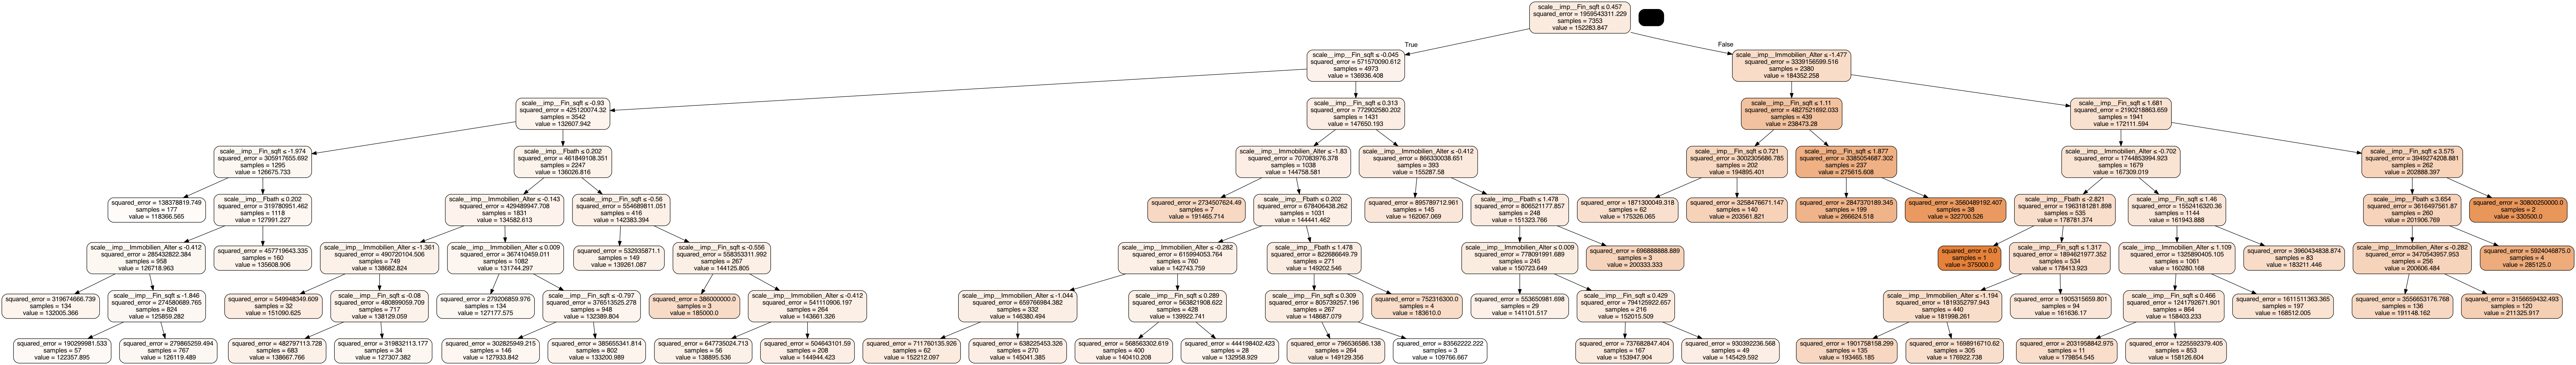

In [ ]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    pipeline_2.named_steps["model"],
    out_file=None,
    feature_names=pipeline_2.named_steps["prep_b"].get_feature_names_out(),
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())